# GETTIN
## Clustering Test
### author @fillfeitosa <fillipefeitosa@ua.pt>

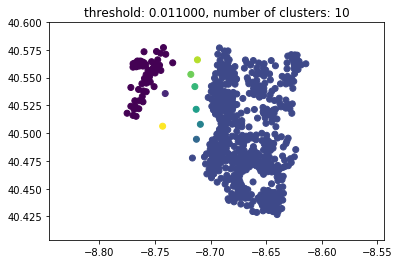

In [7]:
import matplotlib.pyplot as plt
import numpy
import scipy.cluster.hierarchy as hcluster
import scipy.cluster.vq as kmeans
import geopandas as gpd
import geojson

# Getting data from the geojson file
vagos = gpd.read_file('../data_gettin/vagos.geojson');
centroids = vagos.centroid

iteratorHandler = centroids.size
centroidVector = []
for centroid in centroids:
    obj = [centroid.xy[0][0], centroid.xy[1][0]]
    centroidVector.append(obj)
    
# Hiraquical clustering
thresh = 0.011
clusters = hcluster.fclusterdata(centroidVector, thresh, criterion="distance")

# Kmeans Clustering
k = 24
kmeansClusters = kmeans.kmeans2(centroidVector, k)

# plotting
plt.scatter(*numpy.transpose(centroidVector), c=clusters)
plt.axis("equal")
title = "threshold: %f, number of clusters: %d" % (thresh, len(set(clusters)))
plt.title(title)
plt.show()

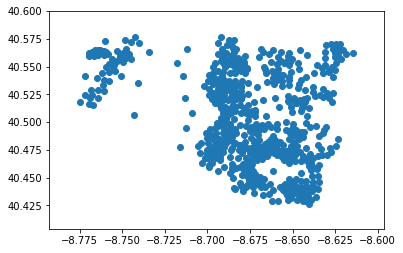

In [8]:
# generate Centroids plot
plt.scatter(*zip(*centroidVector))
plt.show()

In [9]:
kmeansClusters[1]

array([17, 17,  8,  8,  8,  8,  8,  8,  8,  0,  4,  4,  4,  4, 20,  4,  4,
        4, 20,  4, 20,  4,  4, 20,  4, 20, 20, 20,  4,  4,  4, 20, 10, 10,
        4, 20, 10,  4,  4, 20,  4,  4, 10,  4, 10, 10, 10, 10, 10, 10, 10,
        4, 10,  4, 10, 23, 20,  4, 10, 23, 10, 20,  4, 23,  4, 10, 12, 12,
       12, 16, 21, 12, 23, 12, 16, 23, 16, 16, 16, 21, 16, 16,  9, 16, 12,
       16, 16, 16, 21,  9,  8, 16, 16,  9, 16,  1,  0,  1,  0,  1,  5,  0,
        1,  1, 22,  7,  0,  0,  1, 22, 22,  1, 22, 22, 22,  1,  0,  6, 23,
       12, 23, 16, 12, 12, 12, 12, 12, 16, 12, 21, 16, 12, 12, 12, 12, 12,
       12, 16, 21, 12, 16, 12, 21, 12, 12, 12, 12, 16, 16, 12, 12, 22,  1,
        0, 22, 22,  6,  6,  0,  0,  0, 22,  0,  5,  5,  0,  5, 22, 22, 22,
        1, 22,  5,  6,  0,  6,  0,  1,  6,  6,  0, 22, 22,  0,  5,  1,  0,
       11, 11, 11, 11, 11, 17, 11, 11, 11, 11, 11, 11, 11, 11, 11,  4,  4,
       20,  4,  4,  4, 10, 20, 23, 10, 10, 23, 10, 10, 12, 10, 12, 20, 23,
       12, 12, 12, 12, 10

In [10]:
clusters

array([ 3,  3,  1,  1,  1,  1,  1,  1,  1,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  1,  3,  3,  3,  1,  3,  3,  3,  1,  5,  3,  3,  3,
        3,  3,  3,  3,  1,  3,  3,  1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,
        3,  1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  1,  3,  3, 10,  3,  3,  3,  3,  3,  3,  1,
        3,  3,  3,  3,  3

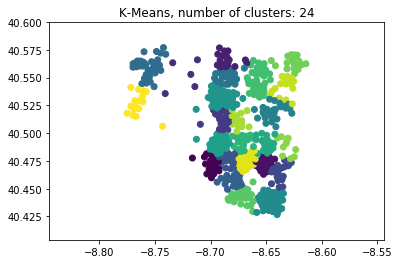

In [11]:
# Kmeans plot
plt.scatter(*numpy.transpose(centroidVector), c=kmeansClusters[1])
plt.axis("equal")
title = "K-Means, number of clusters: %d" % k
plt.title(title)
plt.show()

In [12]:
# Save to File
from geojson import Feature, Point, FeatureCollection
listOfKmeansPoints = []
# for e in kmeansClusters[0]:
#     listOfKmeansCentroids.append(Feature(geometry=e))
for e in kmeansClusters[0]:
    listOfKmeansPoints.append(Point((e[0],e[1])))
# listOfKmeansCentroids = FeatureCollection(listOfKmeansPoints)

listOfKmeansFeatures = []
kmeansColor = {"marker-color":"#e83434","marker-size": "medium","marker-symbol": ""}
for e in listOfKmeansPoints:
    listOfKmeansFeatures.append(Feature(geometry=e, properties=kmeansColor))
listOfKmeansFeatures

collection = FeatureCollection(listOfKmeansFeatures)
collection
dump = geojson.dumps(collection, sort_keys=True)
dump

# with open('../data_gettin/cluster-kmean-%d.geojson' % k, 'w') as outfile:
#      outfile.write(dump)


'{"features": [{"geometry": {"coordinates": [-8.698866886660827, 40.47170949746741], "type": "Point"}, "properties": {"marker-color": "#e83434", "marker-size": "medium", "marker-symbol": ""}, "type": "Feature"}, {"geometry": {"coordinates": [-8.651493068364447, 40.47210496467764], "type": "Point"}, "properties": {"marker-color": "#e83434", "marker-size": "medium", "marker-symbol": ""}, "type": "Feature"}, {"geometry": {"coordinates": [-8.685494136261365, 40.56569788736357], "type": "Point"}, "properties": {"marker-color": "#e83434", "marker-size": "medium", "marker-symbol": ""}, "type": "Feature"}, {"geometry": {"coordinates": [-8.723705128550005, 40.55190404549717], "type": "Point"}, "properties": {"marker-color": "#e83434", "marker-size": "medium", "marker-symbol": ""}, "type": "Feature"}, {"geometry": {"coordinates": [-8.689659095886112, 40.51188290784479], "type": "Point"}, "properties": {"marker-color": "#e83434", "marker-size": "medium", "marker-symbol": ""}, "type": "Feature"}, 